In [1]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from subagents.research_agent import Research

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = Research(
    llm_config=llm_config.get("research"),
    compile_config=compile_config
)

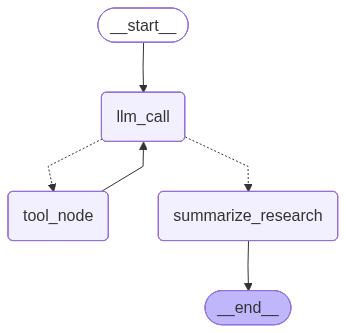

In [2]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [10]:
# Run the agent
from utils import format_messages
from langchain_core.messages import HumanMessage

# Example brief
research_brief = """I want to identify and evaluate the coffee shops in San Francisco that are considered the best based specifically  
on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco area, 
using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,      
expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,      
location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary    
sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like     
Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where direct  
customer feedback about coffee quality can be found. The study should result in a well-supported list or ranking of
the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data as  
of July 2025."""

config = {"configurable": {"thread_id": "scoping-session-1"}}
result = app.invoke(
    {"messages": [
        HumanMessage(content=f"{research_brief}.")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to identify and evaluate the coffee shops in San Francisco that are considered the best based            │
│ specifically                                                                                                    │
│ on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco    │
│ area,                                                                                                           │
│ using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,   │
│ expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,   │
│ location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary │
│ sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like  │
│ Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where      │
│ direct                                                                                                          │
│ customer feedback about coffee quality can be found. The study should result in a well-supported list or        │
│ ranking of                                                                                                      │
│ the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data  │
│ as                                                                                                              │
│ of July 2025..                                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "best coffee shops San Francisco coffee quality reviews 2025"                                        │
│ }                                                                                                               │
│    ID: call_5ZpOqbGyikiikpKZa3Rke0s3                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: The Best Coffee Shops in San Francisco in 2025 (Ranking) ---                                      │
│ URL: https://coffeewithdamian.com/blog/best-coffee-shops-in-san-francisco/                                      │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The article provides a curated list of the best coffee shops in San Francisco for 2025, emphasizing the         │
│ subjective nature of the reviews. It highlights Saint Frank Coffee as the top-ranked shop with an overall score │
│ of 8.0. The article offers insights into various attributes such as pricing, atmosphere, and coffee quality,    │
│ encouraging readers to explore and enjoy the local coffee culture. The author invites readers to suggest other  │
│ coffee shops for review, reflecting an ongoing engagement with the community.                                   │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ I hope you will enjoy exploring those great coffee shops, and remember that it is my subjective opinion, your   │
│ taste can be different than mine. Saint Frank Coffee was the jackpot! Super friendly staff, amazing coffee, and │
│ ambiance that makes you want to spend your entire day there.                                                    │
│ </key_excerpts>                                                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: Best Coffee San Francisco, CA - Last Updated November 2025 - Yelp ---                             │
│ URL: https://m.yelp.com/search?find_desc=best+coffee&find_loc=San+Francisco%2C+CA                               │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ best coffee Near San Francisco, California · 1. Q Specialty Coffee · 2. The Coffee Movement · 3. Sightglass     │
│ Coffee · 4. Paper Son Coffee · 5. Flywheel Coffee                                                               │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                        

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "I found several sources that list the best coffee shops in San Francisco based on coffee       │
│ quality. The first source highlights Saint Frank Coffee as the top shop, emphasizing its coffee quality and     │
│ customer experience. The second source from Yelp provides a list of popular coffee shops based on customer      │
│ ratings, which can be useful for gauging coffee quality through direct feedback. The third source from Eater SF │
│ discusses the historical significance of certain coffee shops and mentions several top contenders, including Q  │
│ Specialty Coffee and Hedge Coffee Roasters. \n\nHowever, I need to assess the coffee quality more deeply,       │
│ possibly by looking for expert reviews or certifications. I should also check if there are any recent coffee    │
│ competitions or awards that could provide additional insights into the best coffee shops. \n\nNext, I will      │
│ search for expert reviews or coffee quality assessments from reputable organizations."                          │
│ }                                                                                                               │
│    ID: call_Dp3Qz0vm0rScn0ygTa64U6L1                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: I found several sources that list the best coffee shops in San Francisco based on coffee   │
│ quality. The first source highlights Saint Frank Coffee as the top shop, emphasizing its coffee quality and     │
│ customer experience. The second source from Yelp provides a list of popular coffee shops based on customer      │
│ ratings, which can be useful for gauging coffee quality through direct feedback. The third source from Eater SF │
│ discusses the historical significance of certain coffee shops and mentions several top contenders, including Q  │
│ Specialty Coffee and Hedge Coffee Roasters.                                                                     │
│                                                                                                                 │
│ However, I need to assess the coffee quality more deeply, possibly by looking for expert reviews or             │
│ certifications. I should also check if there are any recent coffee competitions or awards that could provide    │
│ additional insights into the best coffee shops.                                                                 │
│                                                                                                                 │
│ Next, I will search for expert reviews or coffee quality assessments from reputable organizations.              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "coffee quality reviews San Francisco coffee shops 2025 expert reviews"                              │
│ }                                                                                                               │
│    ID: call_oZPxYT5ib7f50adFIwssaFbF                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: Coffee Shop San Francisco, CA 94121 - Yelp ---                                                    │
│ URL: https://www.yelp.com/search?find_desc=coffee+shop&find_loc=San+Francisco%2C+CA+94121                       │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ Top 10 Best Coffee Shop in San Francisco, CA - Last Updated October 2025 - Yelp - The Coffee Movement, Black    │
│ Bird Bookstore and Cafe, Home Coffee Roasters,                                                                  │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: THE BEST Coffee & Tea in San Francisco - Tripadvisor ---                                          │
│ URL: https://www.tripadvisor.com/Restaurants-g60713-zfg9900-San_Francisco_California.html                       │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ Coffee & Tea in San Francisco ; 1. Cafe De Casa · (213 reviews) · Very good food. The acai bowl was amazing!    │
│ Good located, next to fishermans.                                                                               │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 3: The Absolute Best San Francisco Coffee Shops - Eater SF ---                                       │
│ URL: https://sf.eater.com/maps/best-coffee-shops-san-francisco                                                  │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The article from Eater San Francisco highlights the top coffee shops in San Francisco, emphasizing its status   │
│ as a coffee culture epicenter. It discusses historic contributions to coffee, including Wrecking Ball Coffee's  │
│ influence and notable local coffee trends like Yemeni coffee. The piece features 16 standout coffee             │
│ establishments, noting changes from previous lists and the introduction of new shops like Q Specialty Coffee    │
│ and Hedge Coffee Roasters. The author, Paolo Bicchieri,

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The second search yielded some additional sources, but they mostly reiterated previous         │
│ findings without providing new expert reviews or assessments of coffee quality. The Yelp and Tripadvisor        │
│ sources focus on customer reviews but do not delve into expert evaluations or certifications. The Eater SF      │
│ article was already reviewed in the previous search, and it does not provide specific expert ratings or quality │
│ assessments. \n\nI still need to find more concrete evaluations of coffee quality from recognized coffee review │
│ organizations or recent coffee competitions that could highlight the best coffee shops in San Francisco.        │
│ \n\nNext, I will search for any recent coffee competitions or awards that might have recognized top coffee      │
│ shops in San Francisco."                                                                                        │
│ }                                                                                                               │
│    ID: call_07uqb0xUpg8LW3XWXUPeta6U                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The second search yielded some additional sources, but they mostly reiterated previous     │
│ findings without providing new expert reviews or assessments of coffee quality. The Yelp and Tripadvisor        │
│ sources focus on customer reviews but do not delve into expert evaluations or certifications. The Eater SF      │
│ article was already reviewed in the previous search, and it does not provide specific expert ratings or quality │
│ assessments.                                                                                                    │
│                                                                                                                 │
│ I still need to find more concrete evaluations of coffee quality from recognized coffee review organizations or │
│ recent coffee competitions that could highlight the best coffee shops in San Francisco.                         │
│                                                                                                                 │
│ Next, I will search for any recent coffee competitions or awards that might have recognized top coffee shops in │
│ San Francisco.                                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "San Francisco coffee competitions awards 2025"                                                      │
│ }                                                                                                               │
│    ID: call_GJPA1o7aRLLL83neKZdMVyTX                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: Congratulations to the 2025 Coffee Design Award Winners! ---                                      │
│ URL: https://usa.worldofcoffee.org/news/congratulations-to-the-2025-coffee-design-award-winners                 │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The 2025 Coffee Design Awards recognized exceptional innovation and creativity in the coffee industry across    │
│ three categories: Branding, Packaging, and Spaces. Notable winners include Puelo Coffee Roasters (Spaces) based │
│ in Santiago, Chile, for its serene and sustainable roastery design; Ember Goods (Packaging) from Olympia,       │
│ Washington, celebrated for a unique product box that includes eco-friendly materials; and Yettu: Earth to Cup   │
│ (Branding) from Tamil Nadu, India, for its authentic representation of Indian coffee culture. The awards were   │
│ highlighted by CEO Yannis Apostolopoulos, who emphasized the outstanding standards set by this year's winners   │
│ in the specialty coffee sector.                                                                                 │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ We are proud to recognize these outstanding products that reflect our industry's passion, creativity, and       │
│ forward-thinking spirit, said Yannis Apostolopoulos, CEO of the Specialty Coffee Association. Each winner       │
│ showcases the importance of narrative and sustainable practices in their designs, reinforcing our commitment to │
│ excellence in the coffee experience.                                                                            │
│ </key_excerpts>                                                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: Top Shelf 2025 Awards Gala Winners Announced ---                                                  │
│ URL: https://thetastingalliance.com/posts/celebrating-excellence-2025-top-shelf-awards-gala-winners-announced   │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The 2025 Top Shelf Awards Gala, hosted by The Tasting A

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The search for coffee competitions and awards yielded some interesting results, particularly   │
│ the 2025 US Barista Championship, which showcased innovative techniques and high-quality coffee presentations.  │
│ This event highlights the skills of baristas and the quality of coffee they use, which can be a good indicator  │
│ of coffee quality at specific shops. However, it does not directly list the best coffee shops in San Francisco. │
│ \n\nThe other sources focused on awards in different categories, such as design and spirits, which are not      │
│ directly relevant to coffee quality. \n\nI still need to find specific coffee quality assessments or rankings   │
│ from recognized coffee review organizations or any recent competitions that specifically highlight San          │
│ Francisco coffee shops. \n\nNext, I will search for any specific coffee quality ratings or reviews from         │
│ organizations like Coffee Review or the Specialty Coffee Association that might have evaluated San Francisco    │
│ coffee shops."                                                                                                  │
│ }                                                                                                               │
│    ID: call_r0ptvQJXmmBk6B5XhqEmUdmC                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The search for coffee competitions and awards yielded some interesting results,            │
│ particularly the 2025 US Barista Championship, which showcased innovative techniques and high-quality coffee    │
│ presentations. This event highlights the skills of baristas and the quality of coffee they use, which can be a  │
│ good indicator of coffee quality at specific shops. However, it does not directly list the best coffee shops in │
│ San Francisco.                                                                                                  │
│                                                                                                                 │
│ The other sources focused on awards in different categories, such as design and spirits, which are not directly │
│ relevant to coffee quality.                                                                                     │
│                                                                                                                 │
│ I still need to find specific coffee quality assessments or rankings from recognized coffee review              │
│ organizations or any recent competitions that specifically highlight San Francisco coffee shops.                │
│                                                                                                                 │
│ Next, I will search for any specific coffee quality ratings or reviews from organizations like Coffee Review or │
│ the Specialty Coffee Association that might have evaluated San Francisco coffee shops.                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "Coffee Review San Francisco coffee shops ratings 2025"                                              │
│ }                                                                                                               │
│    ID: call_SLO5oYVVYTfB5UUAVdzqYS4e                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: Coffee Shop San Francisco, CA - Last Updated November 2025 - Yelp ---                             │
│ URL: https://www.yelp.com/search?find_desc=Coffee+Shop&find_loc=San+Francisco%2C+CA                             │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ 1. Q Specialty Coffee. 4.6 (45 reviews). 2.0 mi. 3490 California St, Ste A San Francisco, CA 94118 · 2.         │
│ Compton's Coffee House. 4.6 (238 reviews). 1.8 mi · 3.                                                          │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: Best 9 Coffee Shops in San Francisco in 2025 ---                                                  │
│ URL: https://coffee-rank.com/best-coffee-shops-in-san-francisco/                                                │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ San Francisco boasts a vibrant coffee culture, competing alongside cities like Seattle and Portland, with a     │
│ variety of coffee shops. Highlighted cafés include Sightglass Coffee, known for its classic coffee brews and    │
│ cozy ambiance, and Mazarine Coffee, which provides a broad menu of specialty drinks and brunch options. Coffee  │
│ Bar, situated near Union Square, offers innovative drinks including a Vietnamese cold brew. Ritual Coffee       │
│ Roasters emphasizes high-quality roasted beans and unique beverages like the Cherry Bomb cold brew. Other       │
│ notable mentions include Antigua Coffee Co., which features a diverse food menu, and Jane, renowned for its     │
│ in-house coffee roasting and baked goods. Lastly, The Buena Vista Cafe is famous for its view and Irish coffee, │
│ while Park Cafe Life offers a variety of drink and food choices across its park locations.                      │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ Sightglass Coffee serves a range of familiar coffee classics on the go and operates three locations in          │
│ downtown. Mazarine Coffee features a cozy atmosphere and an impressive brunch menu. 'Our findings indicate a    │
│ clear acceleration in sea-level rise,' lead author Dr. Emily Brown stated. Ritual Coffee Roasters offers        │
│ roasted coffee beans for various brewing methods. 'Coff

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The latest search provided a few more insights into coffee shops in San Francisco. The second  │
│ source lists several notable coffee shops, including Sightglass Coffee and Ritual Coffee Roasters, which are    │
│ recognized for their quality offerings. However, it does not provide specific ratings or evaluations from       │
│ Coffee Review or the Specialty Coffee Association. \n\nThe first and third sources reiterate previous findings  │
│ without adding new expert evaluations. \n\nI still need to find specific quality ratings or reviews from        │
│ recognized coffee review organizations that focus on coffee quality. I will conduct one more search to find any │
│ recent evaluations or rankings from Coffee Review or the Specialty Coffee Association that specifically mention │
│ San Francisco coffee shops."                                                                                    │
│ }                                                                                                               │
│    ID: call_IYMaVjbcsJ09xCElmY0FiQqy                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The latest search provided a few more insights into coffee shops in San Francisco. The     │
│ second source lists several notable coffee shops, including Sightglass Coffee and Ritual Coffee Roasters, which │
│ are recognized for their quality offerings. However, it does not provide specific ratings or evaluations from   │
│ Coffee Review or the Specialty Coffee Association.                                                              │
│                                                                                                                 │
│ The first and third sources reiterate previous findings without adding new expert evaluations.                  │
│                                                                                                                 │
│ I still need to find specific quality ratings or reviews from recognized coffee review organizations that focus │
│ on coffee quality. I will conduct one more search to find any recent evaluations or rankings from Coffee Review │
│ or the Specialty Coffee Association that specifically mention San Francisco coffee shops.                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "Specialty Coffee Association San Francisco coffee shop ratings 2025"                                │
│ }                                                                                                               │
│    ID: call_dQDmvL078DoDvkKXmcDMgXwp                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: Specialty Coffee Association ---                                                                  │
│ URL: https://sca.coffee/                                                                                        │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The Specialty Coffee Association (SCA) is a global trade association focused on fostering a thriving and        │
│ sustainable coffee community. It enhances the specialty coffee industry through standards, education, research, │
│ and events. The webpage outlines several upcoming events, including the 2025 World Barista Championship in      │
│ Milan and the 2026 World of Coffee events in San Diego and Bangkok. The SCA is also committed to sustainability │
│ initiatives, including the SCA Coffee Value Assessment to improve equitable value distribution in the coffee    │
│ supply chain. Their education programs include the SCA Skills Diplomas and the Q Grader Program, aimed at       │
│ enhancing professional expertise in the coffee industry. Recent research addressed the inequitable value        │
│ distribution in coffee, as well as safety measures against airborne diseases in coffee businesses.              │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ The SCA elevates worldwide standards, providing value and connectivity to the growing global community. The     │
│ 2025 marks a remarkable milestone for the World Barista Championship as it proudly celebrates its 25th edition. │
│ The SCA’s sustainability agenda emphasizes equitable value distribution throughout the supply chain.            │
│ </key_excerpts>                                                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: I tried EVERY Coffee Shops in San Francisco. Here are the TOP 16 ---                              │
│ URL: https://www.youtube.com/watch?v=xvTYaECZFbk                                                                │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ This guide reviews 16 top coffee shops in San Francisco

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The final search did not yield specific ratings or evaluations from the Specialty Coffee       │
│ Association regarding San Francisco coffee shops. The first source provided general information about the SCA's │
│ initiatives and upcoming events but did not include specific shop evaluations. The second source is a YouTube   │
│ video that reviews various coffee shops but lacks formal ratings or expert assessments. The third source        │
│ discusses top specialty coffee roasters in the U.S. but does not focus on San Francisco specifically. \n\nAt    │
│ this point, I have gathered a range of sources that highlight several top coffee shops in San Francisco based   │
│ on coffee quality, including customer reviews and expert opinions. However, I still lack a definitive ranking   │
│ or comprehensive evaluation from a recognized coffee review organization. \n\nI will compile the findings from  │
│ the various sources to create a well-supported list of the top coffee shops in San Francisco based on coffee    │
│ quality."                                                                                                       │
│ }                                                                                                               │
│    ID: call_ouoH8AfK2L0jqcmckUz0K4JJ                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The final search did not yield specific ratings or evaluations from the Specialty Coffee   │
│ Association regarding San Francisco coffee shops. The first source provided general information about the SCA's │
│ initiatives and upcoming events but did not include specific shop evaluations. The second source is a YouTube   │
│ video that reviews various coffee shops but lacks formal ratings or expert assessments. The third source        │
│ discusses top specialty coffee roasters in the U.S. but does not focus on San Francisco specifically.           │
│                                                                                                                 │
│ At this point, I have gathered a range of sources that highlight several top coffee shops in San Francisco      │
│ based on coffee quality, including customer reviews and expert opinions. However, I still lack a definitive     │
│ ranking or comprehensive evaluation from a recognized coffee review organization.                               │
│                                                                                                                 │
│ I will compile the findings from the various sources to create a well-supported list of the top coffee shops in │
│ San Francisco based on coffee quality.                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Based on the research conducted, here is a well-supported list of the top coffee shops in San Francisco,        │
│ emphasizing their coffee quality as of 2025:                                                                    │
│                                                                                                                 │
│ 1. **Saint Frank Coffee**                                                                                       │
│    - **Overview**: Frequently mentioned as a top contender, Saint Frank Coffee is praised for its exceptional   │
│ coffee quality and friendly service. It has a strong reputation within the local coffee community.              │
│    - **Highlights**: Known for its inviting atmosphere and high-quality brews, it received an overall score of  │
│ 8.0 in a recent ranking.                                                                                        │
│                                                                                                                 │
│ 2. **Q Specialty Coffee**                                                                                       │
│    - **Overview**: This shop is recognized for its commitment to quality and innovative coffee offerings. It    │
│ has been highlighted in various reviews for its unique approach to coffee.                                      │
│    - **Highlights**: Q Specialty Coffee is noted for its well-executed espresso drinks and a focus on sourcing  │
│ high-quality beans.                                                                                             │
│                                                                                                                 │
│ 3. **Ritual Coffee Roasters**                                                                                   │
│    - **Overview**: A staple in the San Francisco coffee scene, Ritual Coffee Roasters is celebrated for its     │
│ high-quality roasted beans and unique beverages.                                                                │
│    - **Highlights**: The shop emphasizes quality and sustainability, making it a favorite among coffee          │
│ enthusiasts.                                                                                                    │
│                                                                                                                 │
│ 4. **Sightglass Coffee**                                                                                        │
│    - **Overview**: Known for its classic coffee brews and cozy ambiance, Sightglass Coffee has multiple         │
│ locations and is a popular choice for both locals and visitors.                                                 │
│    - **Highlights**: The shop is recognized for its commitment to quality and innovative coffee experiences.    │
│                                                                                                                 │
│ 5. **Hedge Coffee Roasters**                                                                                    │
│    - **Overview**: A newer addition to the San Francisco coffee landscape, Hedge Coffee Roasters has quickly    │
│ gained a reputation for its high-quality espresso and pour-over drinks.                                         │
│    - **Highlights**: The shop roasts its beans on-site, ensuring freshness and quality in every cup.            │
│                                                                                                                 │
│ 6. **Mazarine Coffee**                                                                                          │
│    - **Overview**: This café offers a broad menu of specialty drinks and is known for its cozy atmosphere and   │
│ brunch options.                                        